# Problem Set 6
## Isabel Ruffin
### due 3/28/19

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from math import pi,sqrt,sin,exp,cos

## Exercise 8.1
#### A low-pass filter

Using Ohm's law and the capacitor law, and assuming the output load has very high impedance (so a negligible amount of current flows through it), we can write down the equations governing the low-pass filter circuit as follows. Let I be the current that flows through R and into the capacitor, and let Q be the charge on the capacitor. Then: 
$$IR = V_{in}-V_{out}, \space Q=CV_{out}, \space I=\frac{dQ}{dt}$$
From these equations we find that $$\frac{dV_{out}}{dt} = \frac{1}{RC}(V_{in}-V_{out})$$

a) Write a program to solve this equation for $V_{out}(t)$ using the fourth-order Runge-Kutta method when the input signal is a square-wave with frequency 1 and amplitude 1:
$$V_{in}(t) = \begin{cases} 
      1 & if \space [2t] \space is \space even, \\
      -1 & if \space [2t] \space is \space odd \\ 
   \end{cases}$$
   
where [x] means x rounded down to the next lowest integer. Use the program to make plots of the output of the filter circuit from t = 0 to t = 10 when RC = 0.01, 0.1, and 1, with initial condition $V_{out}(0)=0$. Try a variety of different values for h and choose one that seems sensible, noting that small values gives more accurate results, but the program will take longer to run. 

In [33]:
# 4th order Runge-Kutta: 
# Accurate to order h^4

def Vin(t):
    '''input voltage, t = time'''
    x = int(2*t//1) # round down to next lowest int
    
    if x%2 == 0:
        return 1
    if x%2 == 1:
        return -1
    else:
        print("Error")
        return None
        

def f(Vout, t, RC):
    '''ODE to describe Vout(t)
    t = time, RC = constant (Ohms*C)'''
    return (Vin(t)-Vout)/(RC)

def solveV(N,RC):
    '''solves f for Vout using 4th order Runge-Kutta
    N = # steps, RC = constant
    returns time and Vout arrays'''
    a = 0.0
    b = 10.0
    h = (b-a)/N

    t_arr = np.arange(a,b,h)
    v_arr = np.zeros(len(t_arr))

    v = 0.0 # initial condition

    for i in range(len(t_arr)):
        t = t_arr[i]
        v_arr[i] = v
        
        k1 = h*f(v,t,RC)
        k2 = h*f(v+0.5*k1,t+0.5*h,RC)
        k3 = h*f(v+0.5*k2,t+0.5*h,RC)
        k4 = h*f(v+k3,t+h,RC)
        
        v += (k1+2*k2+2*k3+k4)/6
        
    return t_arr,v_arr
    

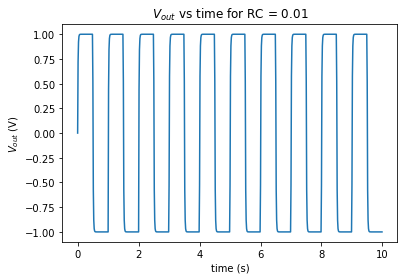

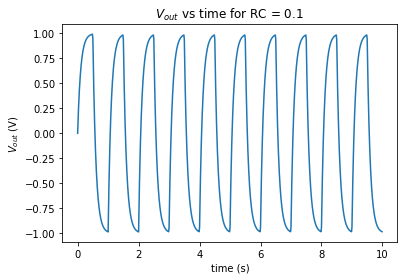

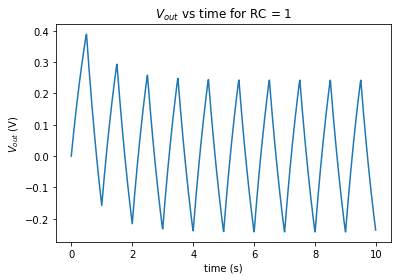

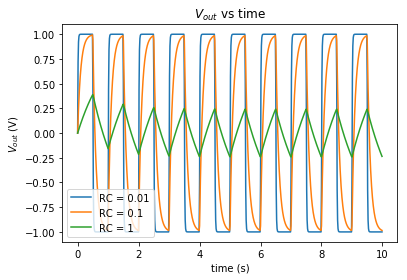

In [83]:
N = 700
t_arr1,v_arr1 = solveV(N,0.01)
t_arr2,v_arr2 = solveV(N,0.1)
t_arr3,v_arr3 = solveV(N,1)

plt.figure()
plt.plot(t_arr1,v_arr1)
plt.xlabel("time (s)")
plt.ylabel("$V_{out}$ (V)")
plt.title("$V_{out}$ vs time for RC = 0.01")

plt.figure()
plt.plot(t_arr2,v_arr2)
plt.xlabel("time (s)")
plt.ylabel("$V_{out}$ (V)")
plt.title("$V_{out}$ vs time for RC = 0.1")

plt.figure()
plt.plot(t_arr3,v_arr3)
plt.xlabel("time (s)")
plt.ylabel("$V_{out}$ (V)")
plt.title("$V_{out}$ vs time for RC = 1")

plt.figure()
plt.plot(t_arr1,v_arr1,label="RC = 0.01")
plt.plot(t_arr2,v_arr2,label="RC = 0.1")
plt.plot(t_arr3,v_arr3,label="RC = 1")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("$V_{out}$ (V)")
_ = plt.title("$V_{out}$ vs time")

b) Based on the graphs produced, describe what you see and explain what the circuit is doing.

In the first graph, the voltage across the capacitor decays very quickly (decay constant is 1/RC), so the output voltage is basically the same as the input voltage (in this case a square wave). As RC increases, the capacitor does not fully charge or discharge so the output potential just goes immediately from rising to decaying, yielding a spikey graph with lower amplitude output potential.

## Exercise 8.2
#### The Lotka-Volterra equations

The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables x and y be proportional to the size of the populations (in thousands) of rabbits and foxes respectively. In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of the foxes:
$$\frac{dx}{dt}=\alpha x - \beta xy$$ where $\alpha,\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits, but also die of old age at a rate proportional to their own population: $$\frac{dy}{dt}=\gamma xy-\delta y$$ where $\gamma,\delta$ are also constants.

a) Write a program to solve these equations using the fourth order Runge-Kutta method for the case $\alpha$ = 1, $\beta = \gamma$ = 0.5, and $\delta$ = 2, starting from the initial condition x = y = 2. Have the program make a graph showing both x and y as a function of time on the same axes from t = 0 to t = 30. 

In [85]:
# constants
a = 1
b = 0.5
c = 0.5
d = 2

def f(r,t):
    '''ODE to describe x(t) and y(t)
    input [x,y]
    t = time
    returns array [fx,fy]'''
    
    x = r[0]
    y = r[1]
    fx = a*x-b*x*y
    fy = c*x*y-d*y
    
    return np.array([fx,fy])


def solveXY(N):
    '''solves f for x & y using 4th order Runge-Kutta
    N = # steps
    returns time, x, and y arrays'''
    
    a = 0.0
    b = 30.0
    h = (b-a)/N

    t_arr = np.arange(a,b,h)
    x_arr = np.zeros(len(t_arr))
    y_arr = np.zeros(len(t_arr))

    # initial condition
    # r[0] = rabbits, r[1] = foxes
    r = np.array([2.0,2.0]) 
    
    
    for i in range(len(t_arr)):
        t = t_arr[i]
        x_arr[i] = r[0]
        y_arr[i] = r[1]
        
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        
        r += (k1+2*k2+2*k3+k4)/6
        
    return t_arr,x_arr,y_arr

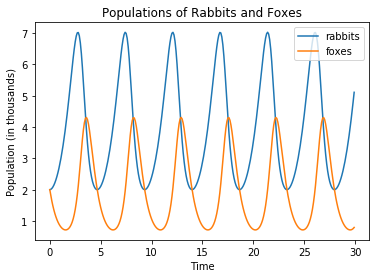

In [97]:
arrs = solveXY(300)

plt.plot(arrs[0],arrs[1], label = "rabbits")
plt.plot(arrs[0],arrs[2], label = "foxes")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population (in thousands)")
_ = plt.title("Populations of Rabbits and Foxes")

b) Describe in words what is going on in the system, in terms of rabbits and foxes.

When the fox population dips, the rabbit population rises (they are not being eaten), which in turn causes the population of foxes to rise again (they have more food). As the population of foxes continues to rise, the population of rabbits falls (too many foxes are eating them), which causes another decrease in the fox population.

## Exercise 8.3
#### The Lorenz equations

The famousLorenz equations are the set of differential equations:
$$\frac{dx}{dt} = \sigma (y-x), \space \frac{dy}{dt} = rx - y - xz, \space \frac{dz}{dt} = xy-bz$$
where $\sigma$, r, and b are constants.

These equations were one of the first incontrovertible examples of deterministic chaos, the occurence of apparently random motion even though there is no randomness built into the equations.

a) Write a program to solve the Lorenz equations for the case $\sigma$ = 10, r = 28, and b = $\frac{8}{3}$ in the range t = 0 to t = 50 with initial conditions (x,y,z) = (0,1,0). Have the program make a plot of y as a function of time. Note the unpredictable nature of the motion.

In [470]:
#constants
s = 10
b = 8.0/3.0
r = 28

def f(q,t):
    '''ODE to describe x(t), y(t), z(t)
    input [x,y,z]
    t = time
    returns array [fx,fy,fz]'''
    
    x = q[0]
    y = q[1]
    z = q[2]
    fx = s*(y-x)
    fy = r*x-y-x*z
    fz = x*y-b*z
    
    return np.array([fx,fy,fz])


def solveLorenz(N):
    '''solves f for x, y, z using 4th order Runge-Kutta
    N = # steps
    returns time, x, y, z arrays'''
    
    a = 0.0
    b = 50.0
    h = (b-a)/N

    t_arr = np.arange(a,b,h)
    x_arr = np.zeros(len(t_arr))
    y_arr = np.zeros(len(t_arr))
    z_arr = np.zeros(len(t_arr))

    # initial condition
    q = np.array([0.0,1.0,0.0]) 
    
    for i in range(len(t_arr)):
        t = t_arr[i]
        x_arr[i] = q[0]
        y_arr[i] = q[1]
        z_arr[i] = q[2]
        
        k1 = h*f(q,t)
        k2 = h*f(q+0.5*k1,t+0.5*h)
        k3 = h*f(q+0.5*k2,t+0.5*h)
        k4 = h*f(q+k3,t+h)
        
        q += (k1+2*k2+2*k3+k4)/6
        
    return t_arr,x_arr,y_arr,z_arr

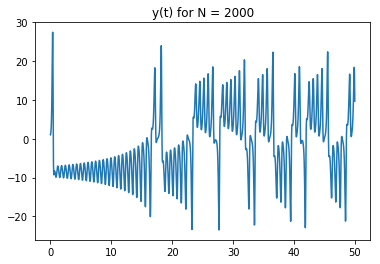

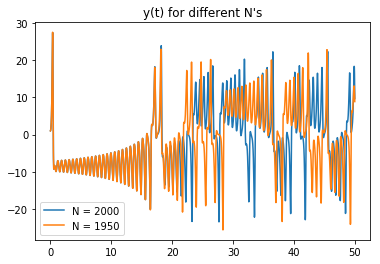

In [130]:
arrs = solveLorenz(2000)
plt.plot(arrs[0],arrs[2],label="N = 2000")
plt.title("y(t) for N = 2000")

plt.figure()
arrs = solveLorenz(2000)
plt.plot(arrs[0],arrs[2],label="N = 2000")
arrs = solveLorenz(1950)
plt.plot(arrs[0],arrs[2],label="N = 1950")
plt.legend()
_ = plt.title("y(t) for different N's")

Note that for a small change in N (here a change of ~2.5%), a very noticable difference emerges in the plot of y(t), indicating its unpredictable nature.

b) Modify your program to produce a plot of z against x.

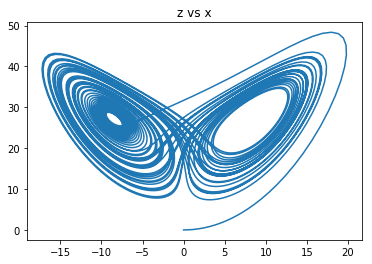

In [138]:
arrs = solveLorenz(5500)
plt.plot(arrs[1],arrs[3])
_ = plt.title("z vs x")

## Exercise 8.7
#### Trajectory with air resistance

Consider a spherical cannonball shot from a cannon standing on level ground. The air resistance on a moving sphere is a force in the opposite direction to the motion with magnitude $$F_r=\frac{1}{2}\pi R^2 \rho C v^2$$ where R is the sphere's radius, $\rho$ is the density of air, v is the velocity, and C is the drag coefficient.

a) Starting from Newton's second law, F = ma, show the equations of motion for the position (x,y) of the cannonball are 
$$\ddot x = -\frac{\pi R^2 \rho C}{2m}\dot x \sqrt{\dot x^2 + \dot y^2}, \space \ddot y = -g-\frac{\pi R^2 \rho C}{2m}\dot y \sqrt{\dot x^2 + \dot y^2}$$
where m is the mass of the cannonball, g is the acceleration due to gravity, and $\dot x$ and $\ddot x$ are the first and second derivatives of x with respect to time.

---
$$F_x = -F_{rx} = m\ddot x, \space and \space F_y = -F_g - F_{ry} = m\ddot y$$

Dividing by m and evaluating the x and y components of $F_r$ respectively (using $v^2 = \dot x^2 + \dot y^2, \space F_{rx} = F_r cos\theta, \space and \space F_{ry} = F_r sin\theta$, with $\theta$ = angle of velocity with respect to the horizontal.
$$\ddot x = -\frac{\pi R^2 \rho C}{2m}\dot x \sqrt{\dot x^2 + \dot y^2}, \space \ddot y = -g-\frac{\pi R^2 \rho C}{2m}\dot y \sqrt{\dot x^2 + \dot y^2}$$


b) Change these two second-order equations into four first-order equations, then write a program that solves the equations for a cannonball of mass 1 kg and radius 8 cm, shot at 30 degrees to the horizontal with initial velocity 100 m s$^{-1}$. The density of air $\rho$ = 1.22 kg m$^{-3}$ and the coefficient of drag for a sphere is C = 0.47. Make a plot of the trajectory of the cannonball.

---
Let the second-order equations become the system:
$$\frac{dx}{dt} = w$$ 

$$\frac{dy}{dt} = z$$ 

$$\frac{dw}{dt} = -\frac{\pi R^2 \rho C}{2m}w\sqrt{w^2+z^2}$$ 

$$\frac{dz}{dt} = -g -\frac{\pi R^2 \rho C}{2m}z\sqrt{w^2+z^2}$$

In [218]:
# constants
m = 1 # mass, kg
R = 0.08 # radius, cm
rho = 1.22 # air density, kg m^-3
C = 0.47 # drag coeff, sphere
g = 9.8 # m/s^2
vi = 100 # initial velocity, m/s
theta = pi/6.0 # initial angle, radians

def f(q,t,m):
    '''ODE to describe x(t), y(t), z(t)
    input [x,y,z]
    t = time
    returns array [fx,fy,fz]'''
    
    x = q[0]
    y = q[1]
    w = q[2]
    z = q[3]
    fx = w
    fy = z
    fw = -pi*R**2*rho*C*w*sqrt(w**2+z**2)/(2*m)
    fz = -g-pi*R**2*rho*C*z*sqrt(w**2+z**2)/(2*m)
    
    return np.array([fx,fy,fw,fz])


def solveCannon(N,m):
    '''solves f for x, y, z using 4th order Runge-Kutta
    N = # steps
    returns time, x, y, z arrays'''
    
    a = 0.0
    b = 15.0
    h = (b-a)/N

    t_arr = np.arange(a,b,h)
    x_arr = np.zeros(len(t_arr))
    y_arr = np.zeros(len(t_arr))
    w_arr = np.zeros(len(t_arr))
    z_arr = np.zeros(len(t_arr))

    # initial condition
    q = np.array([0.0,0.0,vi*cos(theta),vi*sin(theta)]) 
    
    for i in range(len(t_arr)):
        t = t_arr[i]
        x_arr[i] = q[0]
        y_arr[i] = q[1]
        w_arr[i] = q[2]
        z_arr[i] = q[3]
        
        k1 = h*f(q,t,m)
        k2 = h*f(q+0.5*k1,t+0.5*h,m)
        k3 = h*f(q+0.5*k2,t+0.5*h,m)
        k4 = h*f(q+k3,t+h,m)
        
        q += (k1+2*k2+2*k3+k4)/6
        
    return t_arr,x_arr,y_arr,w_arr,z_arr

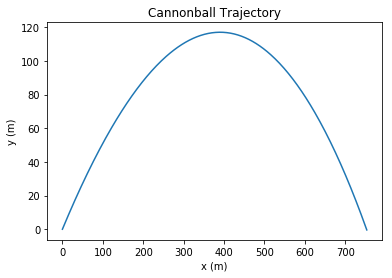

In [230]:
arrs = solveCannon(500,m) 

# plot looks good with N = 40 but using N = 500 for
# consistency with part (c)

i, = np.where(arrs[2]<0)
grd = i[0]+1 # approx time when cannonball hits ground
             # +1 so plot looks better

plt.plot(arrs[1][:grd],arrs[2][:grd])
plt.title("Cannonball Trajectory")
plt.xlabel("x (m)")
_ = plt.ylabel("y (m)")

c) When ignoring air resistance, the distance traveled by a projectile does not depend on its mass. However, mass does make a difference in real life. Estimate the total distance traveled (over horizontal ground) by the cannonball above, then determine whether the cannonball travels further if it is heavier or lighter. You could make a graph of distance traveled  as a function of mass to describe what you discover.

In [231]:
def tot_dist(N,m):
    '''outputs total x distance traveled
    input N steps, mass of ball'''
    
    arrs = solveCannon(N,m)
    i, = np.where(arrs[2]<0)
    grd = i[0] # approx index where cannon hits ground
    
    return arrs[1][grd]

print("Approx total horizontal distance traveled by the cannonball "+
      "= {:2.2f} m".format(tot_dist(500,1)))

Approx total horizontal distance traveled by the cannonball = 242.66 m


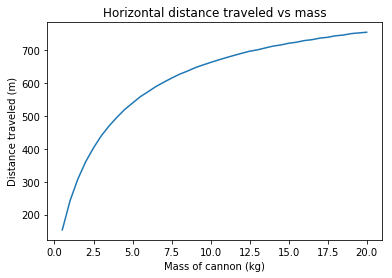

In [234]:
mass_arr = np.linspace(0.5,20,40)
dist_arr = np.zeros(len(mass_arr))

for i in range(len(mass_arr)):
    m = mass_arr[i]
    dist_arr[i] = tot_dist(500,m)
    
    # using N = 500 makes plot smoother
    
plt.plot(mass_arr,dist_arr)
plt.xlabel("Mass of cannon (kg)")
plt.ylabel("Distance traveled (m)")
_ = plt.title("Horizontal distance traveled vs mass")

It is clear from this plot that as the mass of the cannon increases, it travels further (maintaining all other initial conditions). However, the amount by which increasing mass will increase distance traveled becomes smaller as mass increases.

## 8.16 (a) and (b)
#### The three-body problem

Three stars in empty space are initially at rest with specified masses and positions in arbitrary units.

a) Show the equation of motion governing the position $\vec r_1$ of the first star is
$$\frac{d^2\vec r_1}{dt^2} = Gm_2\frac{\vec r_2 - \vec r_1}{|\vec r_2 - \vec r_1|^3} + Gm_3\frac{\vec r_3 - \vec r_1}{|\vec r_3 - \vec r_1|^3}$$
and derive two other similar equations for the positions $\vec r_2, \vec r_3$ of the other stars. Then convert the three second-order equations into six equivalent first order equations.

---
Note Newton's law of universal gravitation states $$\vec F_G = -G\frac{m_1m_2}{r^2}\hat r$$ where G = $6.674 x 10^{-11} m^3kg^{-1}s^{-2}$, m1 and m2 are the masses of the two bodies, and r is the distance between them. From Newton's second law, $$m_1\frac{d^2\vec r_1}{dt^2} = F_{G2} + F_{G3}$$ which, after dividing by $m_1$ and letting $\vec r = \vec r1 - \vec r2$ simplifies to 
$$\frac{d^2\vec r_1}{dt^2} = Gm_2\frac{\vec r_2 - \vec r_1}{|\vec r_2 - \vec r_1|^3} + Gm_3\frac{\vec r_3 - \vec r_1}{|\vec r_3 - \vec r_1|^3}$$

Likewise, the other two equations of motion are easily obtained:
$$\frac{d^2\vec r_2}{dt^2} = Gm_1\frac{\vec r_1 - \vec r_2}{|\vec r_1 - \vec r_2|^3} + Gm_3\frac{\vec r_3 - \vec r_2}{|\vec r_3 - \vec r_2|^3}$$

$$\frac{d^2\vec r_3}{dt^2} = Gm_2\frac{\vec r_2 - \vec r_3}{|\vec r_2 - \vec r_3|^3} + Gm_1\frac{\vec r_1 - \vec r_3}{|\vec r_1 - \vec r_3|^3}$$

---
We can now write this system of equations as six first-order equations:

$$\frac{d\vec r_1}{dt} = \vec v_1$$

$$\frac{d\vec r_2}{dt} = \vec v_2$$

$$\frac{d\vec r_3}{dt} = \vec v_3$$

$$\frac{d\vec v_1}{dt} = Gm_2\frac{\vec r_2 - \vec r_1}{|\vec r_2 - \vec r_1|^3} + Gm_3\frac{\vec r_3 - \vec r_1}{|\vec r_3 - \vec r_1|^3}$$

$$\frac{d\vec v_2}{dt} = Gm_1\frac{\vec r_1 - \vec r_2}{|\vec r_1 - \vec r_2|^3} + Gm_3\frac{\vec r_3 - \vec r_2}{|\vec r_3 - \vec r_2|^3}$$

$$\frac{d\vec v_3}{dt} = Gm_2\frac{\vec r_2 - \vec r_3}{|\vec r_2 - \vec r_3|^3} + Gm_1\frac{\vec r_1 - \vec r_3}{|\vec r_1 - \vec r_3|^3}$$

b) Working in units where G = 1, write a program to solve your equations and hence calculate the motion of the stars from t = 0 to t = 2. Make a plot showing the trails of all three stars (y vs x). Extend to find the motion from t = 0 to t = 10.

You will need to use an adaptive step size method in order to get the needed accuracy in the fast-moving parts of the motion with a reasonable calculation time. Construct the program so it introduces an error of no more than 10$^{-3}$ in the position of any star per unit time.

In [10]:
# Use adaptive method described in 8.4

m1 = 150.0 # mass of star 1, arb. units
m2 = 200.0 
m3 = 250.0 
G = 1.0 # Grav. contsant, units such that this is true

def f(q):#,t):
    '''ODE to describe r1(t), r2(t), r3(t)
    input q = [[r1],[r2],[r3]]
    t = time
    returns array [fx,fy,fz]'''
    
    r1 = q[0]
    r2 = q[1]
    r3 = q[2]
    
    v1 = q[3]
    v2 = q[4]
    v3 = q[5]
    
    fr1 = v1
    fr2 = v2
    fr3 = v3
    
    fv1 = m2*(r2-r1)/np.power(np.linalg.norm(r2-r1),3)\
        + m3*(r3-r1)/np.power(np.linalg.norm(r3-r1),3)
    fv2 = m1*(r1-r2)/np.power(np.linalg.norm(r1-r2),3)\
        + m3*(r3-r2)/np.power(np.linalg.norm(r3-r2),3)
    fv3 = m2*(r2-r3)/np.power(np.linalg.norm(r2-r3),3)\
        + m1*(r1-r3)/np.power(np.linalg.norm(r1-r3),3)
    
    return np.array([fr1,fr2,fr3,fv1,fv2,fv3])


def solveStars(runtime):
    '''solves f for 3 stars using 4th order Runge-Kutta
    adaptive method in sec. 8.4.
    input # seconds for run
    returns time, r1, r2, r3, end index'''
    
    a = 0.0
    b = runtime
    h = 0.0001 #(b-a)/N # initial h
    d = 1e-4 # target accuracy per unit time

    t_arr = np.arange(a,b,h) # might need to change 
    r1_arr = np.zeros([len(t_arr),2])
    r2_arr = np.zeros([len(t_arr),2])
    r3_arr = np.zeros([len(t_arr),2])
    v1_arr = np.zeros([len(t_arr),2])
    v2_arr = np.zeros([len(t_arr),2])
    v3_arr = np.zeros([len(t_arr),2])

    # initial condition
    q = np.array([[3.0,1.0],[-1.0,-2.0],[-1.0,1.0],[0.0,0.0],[0.0,0.0],[0.0,0.0]]) 
    q_s = np.copy(q)
    q_b = np.copy(q)
    count = 0
    fill = True

    for i in range(len(t_arr)):

        r1_arr[i] = q[0]
        r2_arr[i] = q[1]
        r3_arr[i] = q[2]
        v1_arr[i] = q[3]
        v2_arr[i] = q[4]
        v3_arr[i] = q[5]

        fill = False
        
        while fill == False:

            if count < 2: # 2 small steps
            
                k1 = h*f(q_s)
                k2 = h*f(q_s+0.5*k1)
                k3 = h*f(q_s+0.5*k2)
                k4 = h*f(q_s+k3)
        
                q_s += (k1+2*k2+2*k3+k4)/6.0
            
                count += 1
    
            if count == 2: # one big step
    
                h2 = 2*h
            
                k1 = h2*f(q_b)
                k2 = h2*f(q_b+0.5*k1)
                k3 = h2*f(q_b+0.5*k2)
                k4 = h2*f(q_b+k3)
            
                q_b += (k1+2*k2+2*k3+k4)/6.0

                # all three stars [star1,star2,star3]
                ex = (q_s[:3,0]-q_b[:3,0])/30.0
                ey = (q_s[:3,1]-q_b[:3,1])/30.0
                euclid_err = np.sqrt(np.square(ex)+np.square(ey))
            
                # prevent diverging h:
                for k in range(3):
                    if euclid_err[k] < 1e-15: # methods were similar
                        euclid_err[k] = h*d/16.0
                
                rho = h*d/euclid_err
                for l in range(3):
                    if rho[l] > 16.0:
                        rho[l] = 16.0
                        
                min_rho = np.min(rho)
            
                if min_rho <= 1.0: # missed target accuracy
                    # reset q_s,q_b
                    q_s = np.copy(q)
                    q_b = np.copy(q)
                    h = h*np.power(min_rho,0.25)
                    count = 0
                
                if min_rho > 1.0: # calc more accurate than needed
                    # keep the results
                    q = np.copy(q_s)
                    q_b = np.copy(q_s)
                    a += 2*h
                    if a > b: # time is up
                        return t_arr,r1_arr,r2_arr,r3_arr,i
                    # make h bigger
                    h = np.power(min_rho,0.25)
                    count = 0
                    fill = True
                  
    return t_arr,r1_arr,r2_arr,r3_arr,i

In [11]:
ans2 = solveStars(2.0)

In [12]:
ans10 = solveStars(10.0)

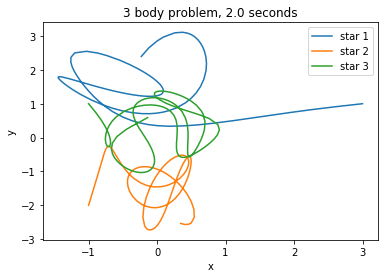

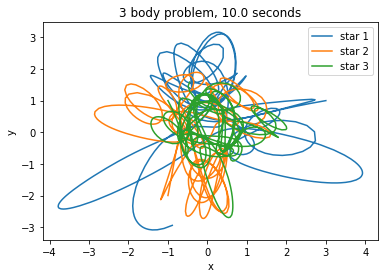

In [13]:
r1 = ans2[1]
r2 = ans2[2]
r3 = ans2[3]
n = ans2[4]+1
plt.plot(r1[:n,0],r1[:n,1],label='star 1')
plt.plot(r2[:n,0],r2[:n,1],label='star 2')
plt.plot(r3[:n,0],r3[:n,1],label='star 3')
plt.title("3 body problem, 2.0 seconds")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.figure()
r1 = ans10[1]
r2 = ans10[2]
r3 = ans10[3]
n = ans10[4]+1
plt.plot(r1[:n,0],r1[:n,1],label='star 1')
plt.plot(r2[:n,0],r2[:n,1],label='star 2')
plt.plot(r3[:n,0],r3[:n,1],label='star 3')
plt.title("3 body problem, 10.0 seconds")
plt.legend()
plt.xlabel("x")
_ = plt.ylabel("y")
plt.show()

Note that I used an error of 10^-4 as my threshold instead of 10^-3, in order to make my plots look a little smoother. 